In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

filename = 'training_data.csv'
training_data = pd.read_csv(filename)
training_data

FileNotFoundError: [Errno 2] No such file or directory: 'training_data.csv'

In [8]:
import pandas as pd

# Load the data into a Pandas DataFrame
data = pd.read_csv('data/well_data_with_facies.csv')

# Select the variables of interest
variables = ['GR', 'ILD_log10', 'PE', 'DeltaPHI', 'PHIND', 'NM_M', 'RELPOS']

# Calculate the correlation matrix
corr_matrix = data[variables].corr()

# Print the correlation coefficients for each variable
for var in variables:
    print(var)
    print(corr_matrix[var])
    print("---------------------")

GR
GR           1.000000
ILD_log10   -0.203437
PE          -0.545498
DeltaPHI     0.404541
PHIND        0.336678
NM_M        -0.376554
RELPOS      -0.156818
Name: GR, dtype: float64
---------------------
ILD_log10
GR          -0.203437
ILD_log10    1.000000
PE           0.322016
DeltaPHI    -0.288612
PHIND       -0.726108
NM_M         0.126381
RELPOS      -0.004198
Name: ILD_log10, dtype: float64
---------------------
PE
GR          -0.545498
ILD_log10    0.322016
PE           1.000000
DeltaPHI    -0.368107
PHIND       -0.465703
NM_M         0.516030
RELPOS       0.073612
Name: PE, dtype: float64
---------------------
DeltaPHI
GR           0.404541
ILD_log10   -0.288612
PE          -0.368107
DeltaPHI     1.000000
PHIND        0.295289
NM_M        -0.471966
RELPOS       0.089936
Name: DeltaPHI, dtype: float64
---------------------
PHIND
GR           0.336678
ILD_log10   -0.726108
PE          -0.465703
DeltaPHI     0.295289
PHIND        1.000000
NM_M        -0.319581
RELPOS      -0.00770

In [ ]:
from sklearn import afd

In [12]:
import pandas as pd
from sklearn.decomposition import PCA

# Load the data into a Pandas DataFrame
data = pd.read_csv('data/well_data_with_facies.csv')

# Select the variables of interest
X = data[['GR', 'ILD_log10', 'PE', 'DeltaPHI', 'PHIND']]

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the PCA object to the data
pca.fit(X)

# Transform the data into the new PCA space
X_pca = pca.transform(X)

# Print the explained variance ratio for each component
print(pca.explained_variance_ratio_)

# Print the transformed data
print(X_pca)

# Create a PCA object with all components
pca = PCA()

# Fit the PCA object to the data
pca.fit(X)

# Calculate the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
print(cumulative_var_ratio)

[0.95731281 0.03060109]
[[ 8.59149586 -1.54097244]
 [19.7812008  -0.47746619]
 [25.66867831  1.26940109]
 ...
 [33.28374366  3.24174553]
 [33.81594526  3.54297644]
 [33.01585248  4.28374801]]
[0.95731281 0.98791389 0.99963417 0.99995198 1.        ]


[0.51928979 0.20890968 0.13518623]
[[32.59079414 30.13744586 15.70310034]
 [39.25055833 36.3765266  16.3568439 ]
 [43.72348952 39.6198514  15.81579511]
 ...
 [47.30287969 41.08337832 20.84468303]
 [47.88751415 41.46623805 20.44290571]
 [48.02286917 40.91309644 19.88406501]]
[0.95731281 0.98791389 0.99963417 0.99995198 1.        ]


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


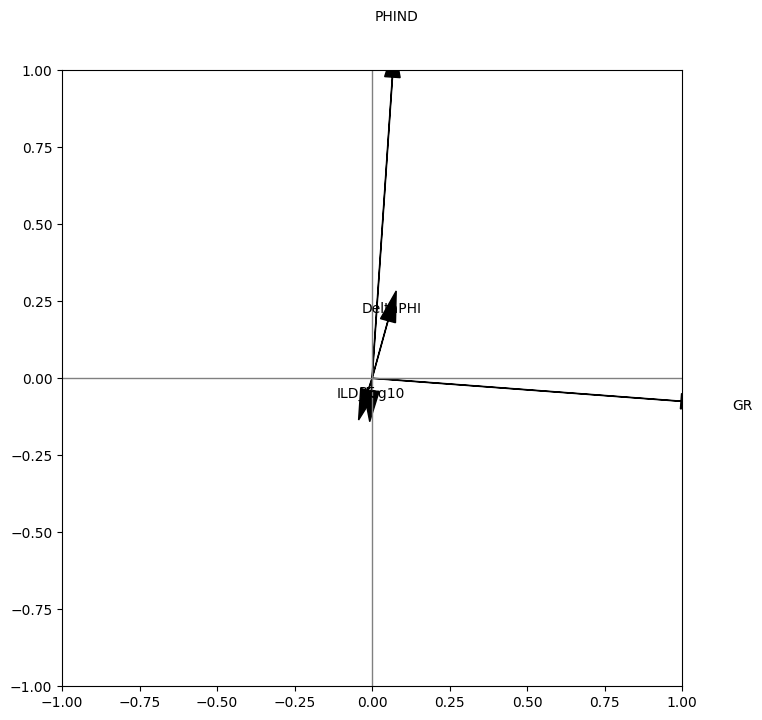

In [18]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data into a Pandas DataFrame
data = pd.read_csv('data/well_data_with_facies.csv')

# Select the variables of interest
X = data[['GR', 'ILD_log10', 'PE', 'DeltaPHI', 'PHIND']]

scaler=StandardScaler()
X_Scaled=scaler.fit_transform(X)
# Create a PCA object with 2 components
pca = PCA(n_components =3)

# Fit the PCA object to the data
pca.fit(X_Scaled)

# Transform the data into the new PCA space
X_pca = pca.transform(X)


# Print the explained variance ratio for each component
print(pca.explained_variance_ratio_)

# Print the transformed data
print(X_pca)

# Create a PCA object with all components
pca = PCA()

# Fit the PCA object to the data
pca.fit(X)

# Calculate the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
print(cumulative_var_ratio)



In [ ]:
# Load the data into a Pandas DataFrame
data = pd.read_csv('data/training_data.csv.csv')

# Select the variables of interest
X = data[['GR', 'ILD_log10', 'PE', 'DeltaPHI', 'PHIND']]
y = data['target_variable'] # replace 'target_variable' with the name of your target variable

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA object with 3 components
pca = PCA(n_components=3)

# Fit the PCA object to the data
pca.fit(X_scaled)

# Transform the data into the new PCA space
X_pca = pca.transform(X_scaled)

# Combine the transformed data with the target variable
data_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
data_pca['target_variable'] = y

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_pca.drop('target_variable', axis=1), data_pca['target_variable'], test_size=0.2, random_state=42)

# Train a machine learning model on the transformed data
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on new data
y_pred = model.predict(X_test)